#   Machine learning and statistical learning
### (Error measure, Overfitting)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MAG3</font>**

## 1. Context and objectives

## 2. First steps: preparing the data
**1. From AMeTICE, download the cars dataset (cars.csv).**

**2. Load the CSV file into R or Python.**

**3. Randomly split your dataset into two parts:**

a) a train set that will contain 80% of the observations

b) a test set that will contain the remaining 20%.

**4. From the train set, create two datasets:**

• a training set that will contain 80% of the observations from the train set

• a validation set that waill contain the remining 20%.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# I have public the data into a github link for all users can use this data without downloading.
link_file = "https://raw.githubusercontent.com/lilyhuong/Machine-learning-statistics/master/cars.csv"
df = pd.read_csv(link_file, index_col=0)

In [3]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0


In [7]:
df.dtypes

year                int64
selling_price       int64
km_driven           int64
fuel             category
seller_type        object
transmission       object
owner            category
mileage           float64
engine            float64
max_power         float64
seats             float64
fuel_num             int8
dtype: object

Firstly, we can see that in this dataframe, we 2 types of variables: integer and string. Because Python can not handle on charater variable, so we need convert this varile into numerical variable. In this exercise, we need only 3 explantory variables: fuel, year, km driven

In [5]:
df.fuel = pd.Categorical(df.fuel)
df['fuel_num'] = df.fuel.cat.codes

In [8]:
df.owner = pd.Categorical(df.owner)

In [9]:
y = df.selling_price    #set target variable 
X = df[["year", "fuel_num", "km_driven"]] #set 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 8)

In [11]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state = 8)

## 3 Getting to know the data: descriptive statistics

#### 1. Compute some summary statistics for the whole dataset (and comment the outputs):
• for numerical variables: mean, minimum, maximum, quartiles

• for categorical variables: for each category: proportion of observations; mean, minimum, maximum, quartiles of the target variable (selling_price)

#### 2. Create graphs to show the relationship between the target variable and the explanatory variables. Comment on these.

In [12]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_num
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,18.802005,1458.625016,91.517919,5.416719,1.891117
std,4.044249,8.062534e+05,5.655055e+04,5.165302,503.916303,35.822499,0.959588,1.002313
min,1983.000000,2.999900e+04,1.000000e+00,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.251852,1197.000000,68.050000,5.000000,1.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.000000,82.000000,5.000000,1.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.070000,1582.000000,102.000000,5.000000,3.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,3.000000


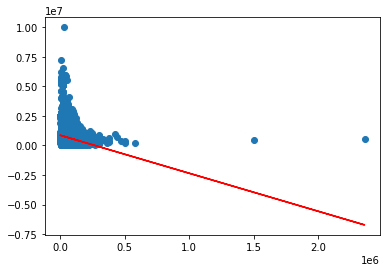

In [99]:
X = df.km_driven
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X, m * X + b, color = "red")

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

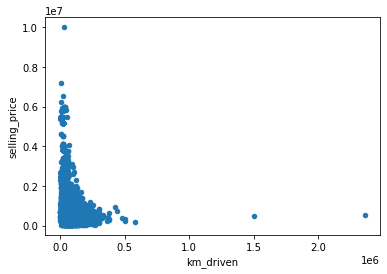

In [20]:
df.plot(kind = 'scatter', x = 'km_driven', y = 'selling_price')

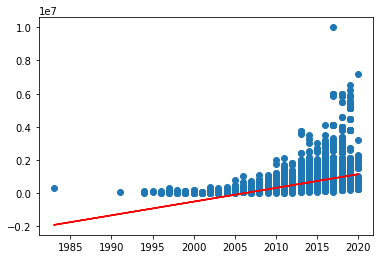

In [28]:
X = df.year
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X, m * X + b, color = "red")

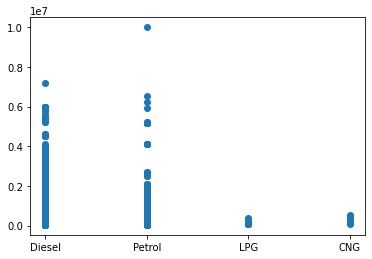

In [31]:
X = df.fuel
#create basic scatterplot
plt.plot(X, y, 'o')

## 4.  Estimations
You will train two different models: a random forest and a SVM. You will understand in more
details how both algorithm work in the subsequent lessons. For now, all you need to understand
is that you can vary some hyperparameters for both models.

 Among the different values that you will try for these hyperparameters, you need to select which provides the best fit, on the
validation set.

Using a random forest algorithm, predict the selling price of the car in the training set.

Use the following variables: year, fuel, km_driven.

If you use R, you can use the randomForest function from {randomForest}. If you use
Python, you can use the RandomForestRegressor function from sklearn.ensemble. You
will use the following hyperparameters for the algorithm:

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [96]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [103]:
X_train, y_train = make_regression(n_features = 3)

In [114]:
regr = RandomForestRegressor(max_features = 3,  n_estimators = 20, min_samples_leaf = 10)

In [115]:
regr.fit(X_val, y_val)

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=20)

In [119]:
print(regr.predict(X_test))

[ 533831.05398823  976294.88778079  741616.9075471  ...  691532.39093561
 2071896.471955    544325.99194428]


### 2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [82]:


score = regr.score(X_train, y_train)
print("R-squared:", score) 
 


R-squared: 0.8432446550819346


In [117]:
ypred = regr.predict(X_test)

In [120]:
ypred = regr.predict(X_val)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

NameError: name 'mean_squared_error' is not defined

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 90, criterion = "entropy")
classifier2.fit( X_train_val, y_train_val )
y_pred_2 = classifier2.predict( X_val )

cm2 = metrics.confusion_matrix( y_test, y_pred_2 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm2[0,0] + cm2[1,1] )/len(X_test)))
scoresRF2 = cross_val_score( classifier2, X_train_val, y_train_val, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF2.mean(), scoresRF2.std() ))

ValueError: could not convert string to float: 'Diesel'